In [2]:
# Step 1: Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
import joblib  # For saving the model


In [4]:
# Step 2: Load and Explore the Dataset


In [5]:
# Load the dataset
df = pd.read_csv('breast_cancer_data.csv')


In [6]:
# Explore the dataset
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area 

In [7]:
# Check the target distribution
print("\nTarget Class Distribution:")
print(df["target"].value_counts())



Target Class Distribution:
target
1    357
0    212
Name: count, dtype: int64


In [8]:
# Check for missing values and duplicate rows
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Missing Values:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

Duplicate Rows:
0


In [9]:
# Step 3: Data Preprocessing


In [10]:
# Split the data into features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [11]:
# Step 4: Split the data into training and testing sets

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [14]:
# Step 5: Model Training


In [15]:
# Train a logistic regression model
model = LogisticRegression(max_iter=100, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [16]:
# Step 6: Model Evaluation


In [17]:
# Make predictions
y_pred = model.predict(X_test)


In [18]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")



Accuracy: 0.97


In [19]:
# Confusion Matrix
confusion = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(confusion)



Confusion Matrix:
[[41  2]
 [ 1 70]]


In [20]:
# Classification Report
classification_rep = classification_report(y_test, y_pred)
print('\nClassification Report:')
print(classification_rep)



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [21]:
# ROC Curve and AUC
y_pred_prob = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


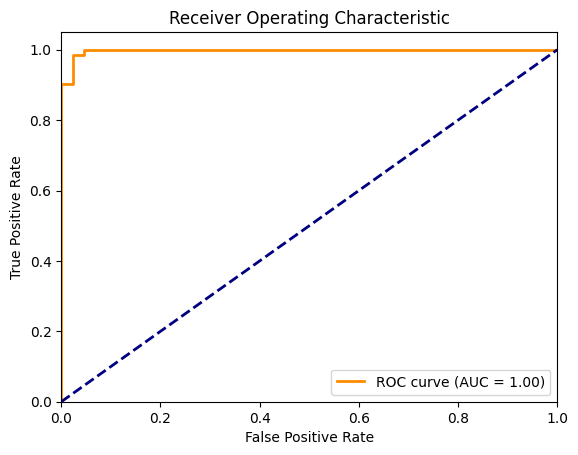

In [22]:
# Plot ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [23]:
# Step 7: Save the Trained Model


In [24]:
joblib.dump(model, 'Breast_Cancer_Prediction_model.pkl')
print("\nModel saved successfully!")



Model saved successfully!


In [25]:
# Step 8: Predict on New Data (Example usage)


In [26]:
def predict_breast_cancer(features):
    # features should be a list or a DataFrame
    features_scaled = scaler.transform([features])  # Scale the input features
    predicted_class = model.predict(features_scaled)[0]
    return predicted_class



In [27]:
# Example usage
example_features = [17.99, 10.38, 122.8, 1001, 0.1184, 0.2776, 0.3001, 0.1471, 0.2416, 0.0789, 0.1812, 0.05647, 0.04068, 0.01347, 0.01948, 0.01661, 0.01339, 0.0024, 0.00368, 0.00259, 0.00452, 0.01564, 0.01809, 0.0131, 0.00349]
predicted_class = predict_breast_cancer(example_features)
print(f"\nPredicted class for the example: {predicted_class}")


c:\Users\Rutvi Shah\anaconda3\envs\victus\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: X has 25 features, but StandardScaler is expecting 30 features as input.